<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

# Loading packages and data

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df_cleaned = pd.read_csv('/Users/harmeetgill/Documents/Jobs/General_assembly/Github_repos/DSI15-project-submissions/Harmeet-Gill/project-4/df_to_clean_v2 copy.csv')

In [3]:
df_cleaned

,Location,salary_mean_normalised,High or low (50%),High or low (75%),Title clean,Company_clean
0,London,30000.00,1,1,computer vision and machine learning engineer,flox ltd
1,Stratford,31000.00,1,1,data and research analyst,cancer research uk
2,London,60000.00,1,1,data scientist verv london or sheffield,austin consultants
3,London,134400.00,1,1,data scientist machine learning,harnham
4,London,51500.00,1,1,principal data scientist,nesta
...,...,...,...,...,...,...
1245,Didcot,60000.00,1,1,"customer success manager, customer experience...",the purely recruitment company ltd
1246,Oxford,27012.00,0,0,employment advisor fixed term contract jets...,activate learning
1247,Oxford,153800.00,1,1,guest speaker,oxford summer courses
1248,Brackley,28773.00,1,1,multi skilled operative,grand union housing group


In [4]:
pd.Series(df_cleaned['Location'].value_counts(normalize=True))

Birmingham    0.1080
London        0.0984
Manchester    0.0968
Sheffield     0.0936
Cambridge     0.0768
               ...  
Belper        0.0008
Upper         0.0008
Coleshill     0.0008
Harefield     0.0008
Bracknell     0.0008
Name: Location, Length: 205, dtype: float64

# Modelling location

### Setting X, y

In [5]:
#set X and target
X=df_cleaned[['Location']]
y=df_cleaned['High or low (50%)']

In [6]:
#dummification of location feature
X=pd.get_dummies(X, drop_first = True)

In [7]:
print(X.shape)
print(y.shape)

(1250, 204)
(1250,)


### Train/test split

In [8]:
#train, test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1000, 204)
(250, 204)
(1000,)
(250,)


### Apply count vectoriser

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english')

cvec.fit(df_cleaned['Title clean'])

cvec_transf = cvec.transform(df_cleaned['Title clean'])



In [12]:
sparse_array = cvec_transf.toarray()
df=pd.DataFrame(sparse_array, columns=cvec.get_feature_names())

In [13]:
title_vec = df.transpose().sort_values(0, ascending=False).transpose()

In [14]:
title_vec.shape

(1250, 1143)

In [15]:
final_df = pd.concat([X_train, title_vec], axis=1)

# Logistic regression gridsearch for location

### Executing model

In [16]:
model = LogisticRegression(random_state=1)

from sklearn.model_selection import GridSearchCV

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'solver' : ['liblinear'],
          'fit_intercept' : [True, False]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  verbose=1)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/harmeetgill/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
         

### Saving logistic regression

In [17]:
#save model as joblib file
import joblib

# joblib.dump(gs, 'log_reg_gs_location.jlib')

In [18]:
#load file
gs=joblib.load('log_reg_gs_location.jlib')

### Evaluating logistic regression

In [19]:
# extract the grid search results
print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

Best Parameters:
{'C': 0.3593813663804626, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator C:
0.3593813663804626
Best estimator mean cross validated training score:
0.5980000000000001
Best estimator score on the full training set:
0.638
Best estimator score on the test set:
0.64
Best estimator coefficients:
[[ 0.         -0.13647659  0.         -0.13647659 -0.35546276  0.
  -0.13647659  0.56658019  0.05359376 -0.13647659 -0.25345163 -0.13647659
  -0.09888641  0.05359376  0.51325081  0.19403563 -0.44572619 -0.29131707
  -0.13647659  0.         -0.35546276 -0.13647659  0.19403563 -0.13647659
   0.05359376 -0.13647659 -0.13647659 -0.09843934 -0.13647659 -0.13647659
  -0.13647659 -0.35546276  0.         -0.13647659  0.71172284  0.19403563
   0.19403563 -0.13647659  0.19403563 -0.25345163  0.         -0.47898852
  -0.0676676  -0.13647659  0.19403563  0.19403563  0.          0.27976555
   0.          0.19403563  0.19403563  0.35857677 -0.13647659  0.19403563
   

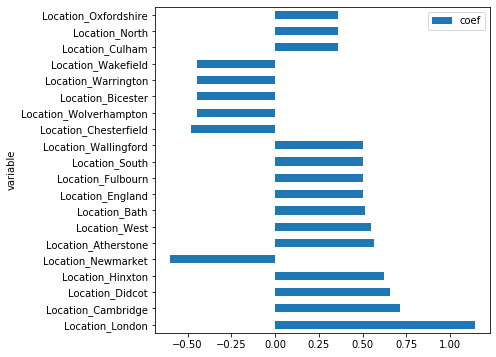

In [20]:
#plot coefficients
coefs_lr = pd.DataFrame({
    'coef': gs.best_estimator_.coef_[0],
    'variable': X.columns,
    'abscoef': np.abs(gs.best_estimator_.coef_[0])
})

top_twenty = coefs_lr.sort_values('abscoef', ascending=False).head(20)
top_twenty.plot(kind='barh', x='variable', y='coef',
                       figsize=(6, 6))
plt.show()

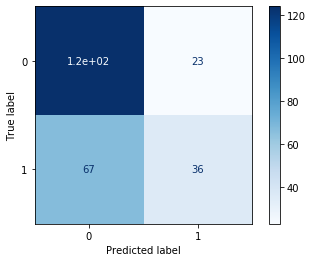

In [21]:
from sklearn.metrics import  plot_confusion_matrix, classification_report
plot_confusion_matrix(gs, X_test, y_test, cmap=plt.cm.Blues);

In [22]:
predictions_train = gs.predict(X_train)
predictions_test = gs.predict(X_test)
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.62      0.85      0.72       535
           1       0.70      0.39      0.50       465

    accuracy                           0.64      1000
   macro avg       0.66      0.62      0.61      1000
weighted avg       0.65      0.64      0.62      1000



# KNN gridsearch for location

### Executing model

In [23]:
#KNN FOR LOCATION ONLY

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV


knn_params = {
    'n_neighbors': [5, 9, 15, 25, 40, 50, 60],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, knn_params, cv=5, verbose=1)

knn_gs.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 9, 15, 25, 40, 50, 60],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

### Saving KNN model

In [24]:
#save model as joblib file
import joblib

# joblib.dump(knn_gs, 'knn_gs.jlib')

In [25]:
#load KNN model
knn_gs=joblib.load('knn_gs.jlib')

### KNN evaluation metrics

In [26]:
# extract the grid search results

print('Best Parameters:')
print(knn_gs.best_params_)
print('Best estimator mean cross validated training score:')
print(knn_gs.best_score_)
print('Best estimator score on the full training set:')
print(knn_gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(knn_gs.score(X_test, y_test))

Best Parameters:
{'metric': 'euclidean', 'n_neighbors': 40, 'weights': 'distance'}
Best estimator mean cross validated training score:
0.594
Best estimator score on the full training set:
0.679
Best estimator score on the test set:
0.608


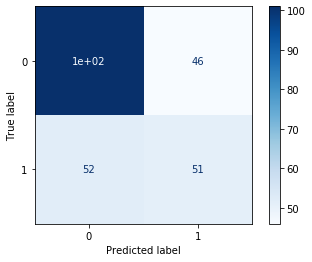

In [27]:
from sklearn.metrics import  plot_confusion_matrix
plot_confusion_matrix(knn_gs, X_test, y_test, cmap=plt.cm.Blues);

In [28]:
predictions_train = knn_gs.predict(X_train)
predictions_test = knn_gs.predict(X_test)
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.66      0.83      0.73       535
           1       0.72      0.51      0.60       465

    accuracy                           0.68      1000
   macro avg       0.69      0.67      0.66      1000
weighted avg       0.69      0.68      0.67      1000



# Random Forest

### Executing and evaluating Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

for i in range(100,201,10):
    for x in range(5,25,5):
        model = RandomForestClassifier(n_estimators=i,
                                      random_state=1, max_depth = x)

        model.fit(X_train, y_train)
        print(cross_val_score(model, X_train, y_train, cv=5).mean())
        print('train score:',model.score(X_train, y_train))
        print('test score:',model.score(X_test, y_test))
        print('n_estimator: ',  i)
        print('max_depth: ', x)
        print('---------------')

0.576
train score: 0.595
test score: 0.644
n_estimator:  100
max_depth:  5
---------------
0.594
train score: 0.627
test score: 0.628
n_estimator:  100
max_depth:  10
---------------
0.595
train score: 0.636
test score: 0.632
n_estimator:  100
max_depth:  15
---------------
0.589
train score: 0.642
test score: 0.636
n_estimator:  100
max_depth:  20
---------------
0.575
train score: 0.598
test score: 0.644
n_estimator:  110
max_depth:  5
---------------
0.593
train score: 0.627
test score: 0.628
n_estimator:  110
max_depth:  10
---------------
0.595
train score: 0.636
test score: 0.628
n_estimator:  110
max_depth:  15
---------------
0.592
train score: 0.643
test score: 0.632
n_estimator:  110
max_depth:  20
---------------
0.576
train score: 0.596
test score: 0.644
n_estimator:  120
max_depth:  5
---------------
0.594
train score: 0.623
test score: 0.632
n_estimator:  120
max_depth:  10
---------------
0.593
train score: 0.635
test score: 0.632
n_estimator:  120
max_depth:  15
-------

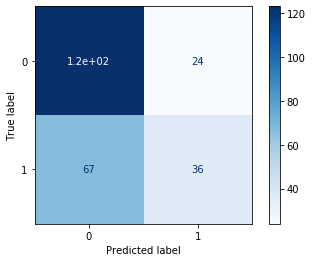

In [30]:
from sklearn.metrics import  plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues);

In [31]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.62      0.85      0.72       535
           1       0.70      0.40      0.51       465

    accuracy                           0.64      1000
   macro avg       0.66      0.62      0.61      1000
weighted avg       0.66      0.64      0.62      1000



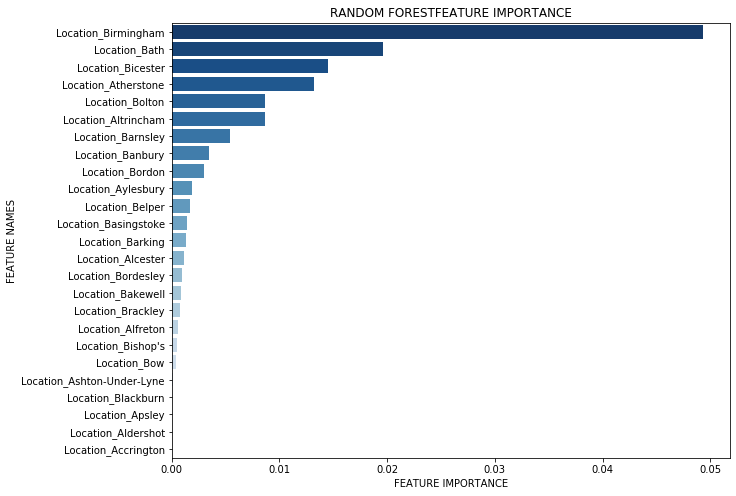

In [33]:
import seaborn as sns
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data).head(25)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],palette='Blues_r')
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(model.feature_importances_, X_train.columns, 'RANDOM FOREST')

# Logistic regression gridsearch for location and title

### Setting parameters

In [34]:
X=df_cleaned[['Location', 'Title clean']]
y=df_cleaned['High or low (50%)']

X=pd.get_dummies(X, drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 1352)
(250, 1352)
(1000,)
(250,)


### Executing logistic regression model

In [36]:
model = LogisticRegression(random_state=1)

from sklearn.model_selection import GridSearchCV

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'solver' : ['liblinear'],
          'fit_intercept' : [True, False]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  verbose=1)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
         

### Saving logistic regression model

In [37]:
#save model as joblib file
import joblib

# joblib.dump(gs, 'lr_gs_loc_salary.jlib')

In [38]:
#load KNN model
# lr_gs_loc_salary=joblib.load('lr_gs_loc_salary.jlib')

### Evaluating logistic regression

In [39]:
# extract the grid search results
print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

Best Parameters:
{'C': 0.3593813663804626, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator C:
0.3593813663804626
Best estimator mean cross validated training score:
0.615
Best estimator score on the full training set:
0.85
Best estimator score on the test set:
0.652
Best estimator coefficients:
[[ 0.         -0.12658839  0.         ... -0.19420901  0.
  -0.12658839]]


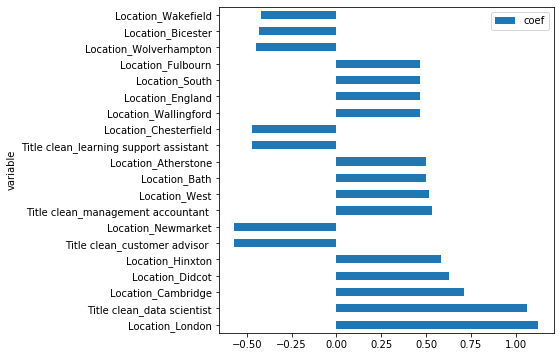

In [40]:
#plot coefficients
coefs_lr = pd.DataFrame({
    'coef': gs.best_estimator_.coef_[0],
    'variable': X.columns,
    'abscoef': np.abs(gs.best_estimator_.coef_[0])
})

top_twenty = coefs_lr.sort_values('abscoef', ascending=False).head(20)
top_twenty.plot(kind='barh', x='variable', y='coef',
                       figsize=(6, 6))
plt.show()

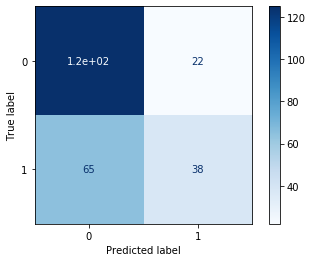

In [41]:
plot_confusion_matrix(gs, X_test, y_test, cmap=plt.cm.Blues);

In [42]:
predictions_train = gs.predict(X_train)
predictions_test = gs.predict(X_test)
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       535
           1       0.86      0.81      0.83       465

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



# KNN gridsearch for location and title

### Executing KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV


knn2_params = {
    'n_neighbors': [5, 9, 15, 25, 40, 50, 60],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}
knn2 = KNeighborsClassifier()
knn2_gs = GridSearchCV(knn2, knn2_params, cv=5, verbose=1)

knn2_gs.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   43.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 9, 15, 25, 40, 50, 60],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

### Saving KNN

In [44]:
#save model as joblib file
import joblib

# joblib.dump(knn2_gs, 'knn2_gs.jlib')

In [45]:
#load KNN model
# knn2_gs=joblib.load('knn2_gs.jlib')

### KNN Evaluation

In [46]:
# extract the grid search results

print('Best Parameters:')
print(knn2_gs.best_params_)
print('Best estimator mean cross validated training score:')
print(knn2_gs.best_score_)
print('Best estimator score on the full training set:')
print(knn2_gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(knn2_gs.score(X_test, y_test))

Best Parameters:
{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best estimator mean cross validated training score:
0.5910000000000001
Best estimator score on the full training set:
0.999
Best estimator score on the test set:
0.62


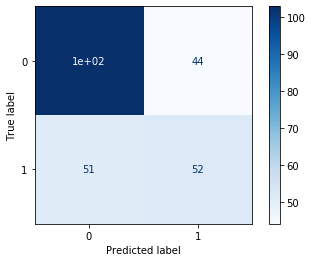

In [47]:
plot_confusion_matrix(knn2_gs, X_test, y_test, cmap=plt.cm.Blues);

In [48]:
predictions_train = knn2_gs.predict(X_train)
predictions_test = knn2_gs.predict(X_test)
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       535
           1       1.00      1.00      1.00       465

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



# Random Forest

### Execution and evaluation of Random Forest

In [49]:
for i in range(100,201,10):
    for x in range(5,25,5):
        model2 = RandomForestClassifier(n_estimators=i,
                                      random_state=1, max_depth = x)

        model2.fit(X_train, y_train)
        print(cross_val_score(model2, X_train, y_train, cv=5).mean())
        print('train score:',model2.score(X_train, y_train))
        print('test score:',model2.score(X_test, y_test))
        print('n_estimator: ',  i)
        print('max_depth: ', x)
        print('---------------')

0.553
train score: 0.579
test score: 0.58
n_estimator:  100
max_depth:  5
---------------
0.583
train score: 0.624
test score: 0.64
n_estimator:  100
max_depth:  10
---------------
0.5860000000000001
train score: 0.698
test score: 0.628
n_estimator:  100
max_depth:  15
---------------
0.596
train score: 0.715
test score: 0.632
n_estimator:  100
max_depth:  20
---------------
0.5519999999999999
train score: 0.6
test score: 0.636
n_estimator:  110
max_depth:  5
---------------
0.583
train score: 0.62
test score: 0.64
n_estimator:  110
max_depth:  10
---------------
0.5860000000000001
train score: 0.691
test score: 0.644
n_estimator:  110
max_depth:  15
---------------
0.598
train score: 0.714
test score: 0.632
n_estimator:  110
max_depth:  20
---------------
0.5519999999999999
train score: 0.575
test score: 0.58
n_estimator:  120
max_depth:  5
---------------
0.584
train score: 0.616
test score: 0.64
n_estimator:  120
max_depth:  10
---------------
0.588
train score: 0.68
test score: 0.6

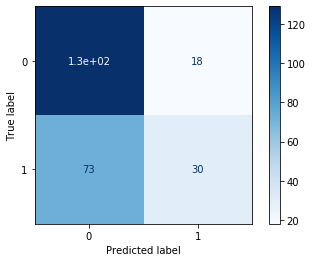

In [50]:
from sklearn.metrics import  plot_confusion_matrix
plot_confusion_matrix(model2, X_test, y_test, cmap=plt.cm.Blues);

In [51]:
predictions_train = model2.predict(X_train)
predictions_test = model2.predict(X_test)
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.65      0.96      0.78       535
           1       0.91      0.40      0.56       465

    accuracy                           0.70      1000
   macro avg       0.78      0.68      0.67      1000
weighted avg       0.77      0.70      0.68      1000



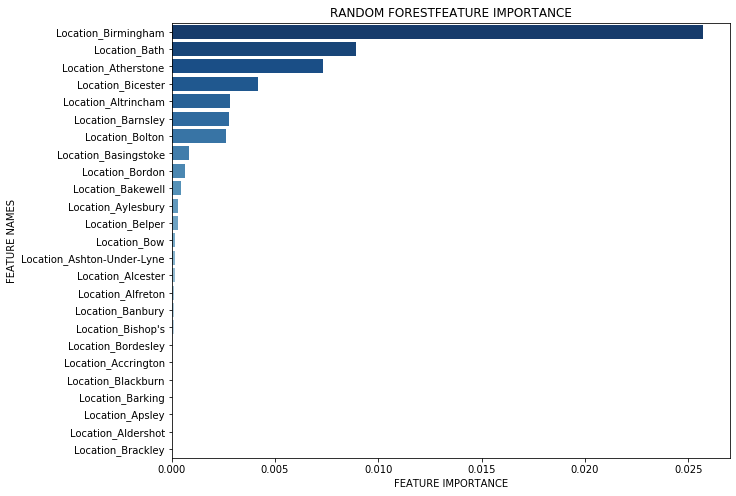

In [52]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data).head(25)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],palette='Blues_r')
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(model2.feature_importances_, X_train.columns, 'RANDOM FOREST')